In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

In [12]:
from sklearn.utils import resample

df_up_sampled = resample(df_minority, n_samples=7963, random_state=123456)
df_up_sampled

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
306,307,15594898,Hewitt,731,France,Male,43,2,0.00,1,1,1,170034.95,1
3543,3544,15801218,Bermudez,675,France,Male,49,8,135133.39,1,0,1,179521.24,1
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
5125,5126,15656086,Bovee,542,Spain,Male,54,8,105770.14,1,0,1,140929.98,1
7724,7725,15673591,Oluchukwu,842,France,Male,44,3,141252.18,4,0,1,128521.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
5535,5536,15694444,Buttenshaw,648,Germany,Female,32,8,157138.99,3,1,0,190994.48,1
4373,4374,15596455,Mao,546,Spain,Female,45,2,0.00,1,0,0,197789.83,1
1454,1455,15608653,Davison,521,Spain,Female,34,7,70731.07,1,1,1,20243.97,1


In [13]:
# concat both the majority class and up sample data frame
df_balanced = pd.concat([df_majority, df_up_sampled])
df_balanced

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
5535,5536,15694444,Buttenshaw,648,Germany,Female,32,8,157138.99,3,1,0,190994.48,1
4373,4374,15596455,Mao,546,Spain,Female,45,2,0.00,1,0,0,197789.83,1
1454,1455,15608653,Davison,521,Spain,Female,34,7,70731.07,1,1,1,20243.97,1


In [14]:
df_balanced['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [15]:
df_balanced.drop('Surname',axis=1, inplace = True)

In [16]:
df_balanced['Geography'].value_counts()

Geography
France     7362
Germany    4869
Spain      3695
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

# create encoder object
encoder = LabelEncoder()

encoder.fit(df_balanced['Geography'])
df_balanced['Geography'] = encoder.transform(df_balanced['Geography'])

In [18]:
df_balanced['Gender'].value_counts()

Gender
Male      8027
Female    7899
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

# create encoder object
encoder = LabelEncoder()

encoder.fit(df_balanced['Gender'])
df_balanced['Gender'] = encoder.transform(df_balanced['Gender'])

In [20]:
df_balanced.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.009041,0.009302,-0.004522,0.020015,-0.000308,-0.007608,-0.009407,0.024254,-0.007728,0.031183,-0.004446,-0.027644
CustomerId,0.009041,1.000000,0.000292,-0.006847,0.006461,0.000402,-0.002454,-0.016294,0.020275,-0.024539,0.002824,0.013747,-0.013595
CreditScore,0.009302,0.000292,1.000000,0.002802,-0.010334,-0.006034,0.012785,0.000765,0.014991,-0.014462,0.018172,-0.028042,-0.037560
Geography,-0.004522,-0.006847,0.002802,1.000000,0.005056,0.022079,-0.018394,0.082747,0.004399,-0.021830,-0.003764,-0.011059,0.048066
Gender,0.020015,0.006461,-0.010334,0.005056,1.000000,-0.043140,0.005506,0.010698,-0.029867,0.005524,0.031977,-0.017941,-0.137013
Age,-0.000308,0.000402,-0.006034,0.022079,-0.043140,1.000000,-0.025028,0.052297,-0.040670,-0.013812,0.016532,-0.000043,0.349220
Tenure,-0.007608,-0.002454,0.012785,-0.018394,0.005506,-0.025028,1.000000,-0.000934,0.019249,0.016602,-0.025283,0.026958,-0.021253
Balance,-0.009407,-0.016294,0.000765,0.082747,0.010698,0.052297,-0.000934,1.000000,-0.176630,-0.007415,-0.032995,0.003686,0.156278
NumOfProducts,0.024254,0.020275,0.014991,0.004399,-0.029867,-0.040670,0.019249,-0.176630,1.000000,-0.002504,0.029897,0.010772,-0.049003
HasCrCard,-0.007728,-0.024539,-0.014462,-0.021830,0.005524,-0.013812,0.016602,-0.007415,-0.002504,1.000000,-0.040095,-0.015549,-0.013441


In [21]:
# split the data into X and y
x = df_balanced.drop(["RowNumber", "CustomerId", "CreditScore", "Geography", "Tenure", "NumOfProducts", "HasCrCard", "EstimatedSalary", "Exited"], axis=1)
y = df_balanced['Exited']

In [22]:
from sklearn.preprocessing import StandardScaler

# create an object of standard scaler
scaler = StandardScaler()

array_scaled = scaler.fit_transform(x)
array_scaled

array([[-1.00806973, -0.01131279,  0.02431457,  1.09227275],
       [-1.00806973, -0.19947721, -1.34381853, -0.91552224],
       [-1.00806973,  0.17685163,  0.70510036,  1.09227275],
       ...,
       [-1.00806973,  0.36501605, -1.34381853, -0.91552224],
       [-1.00806973, -0.66988826, -0.18915931,  1.09227275],
       [-1.00806973, -0.48172384,  2.02443862,  1.09227275]])

<Axes: >

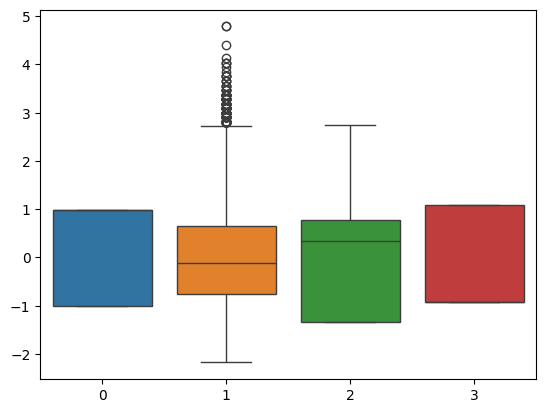

In [23]:
sns.boxplot(array_scaled)

In [24]:
df_scaled = pd.DataFrame(array_scaled, columns=["Gender", "Age","Balance", "isActiveMember"])
df_scaled

,Gender,Age,Balance,isActiveMember
0,-1.008070,-0.011313,0.024315,1.092273
1,-1.008070,-0.199477,-1.343819,-0.915522
2,-1.008070,0.176852,0.705100,1.092273
3,0.991995,0.835427,-1.343819,1.092273
4,0.991995,0.270934,0.975114,1.092273
...,...,...,...,...
15921,-1.008070,0.270934,0.757941,-0.915522
15922,-1.008070,-0.858053,1.221419,-0.915522
15923,-1.008070,0.365016,-1.343819,-0.915522
15924,-1.008070,-0.669888,-0.189159,1.092273


In [25]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [26]:
x_train.shape

(11148, 4)